<a href="https://colab.research.google.com/github/Manvi190502/AgenticAI/blob/main/Groq_langgraph_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade langchain langchain-community langgraph openai langchain_openai
!pip install -q langchain-groq langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.1/158.1 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.5/500.5 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: openai
    Found existing installation: openai 2.17.0
    Uninstalling openai-2.17.0:
      Successfully u

In [7]:
!pip install -U duckduckgo-search
!pip install -U ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 5.5 MB/s eta 0:00:00


In [22]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START
from langchain_openai import ChatOpenAI
import requests
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode, tools_condition
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

In [24]:
from langchain_community.tools import DuckDuckGoSearchRun
def search_duckduckgo(query: str):
  """searches duckduckgo using langchain's DuckDuckGoSearchRun tool"""
  search = DuckDuckGoSearchRun()
  return search.run(query)

result= search_duckduckgo("What are AI agent")
print(result)

This beginner's guide explains what AI agents are , how they differ from traditional automation and chatbots, and why they are becoming essential for businesses. An AI agent is a software component that has the agency to act on behalf of a user or a system to perform tasks. Users can organize agents into systems that can orchestrate complex workflows, coordinate activities among multiple agents , apply logic to thorny problems, and evaluate answers to user queries. Learn the main types of AI agents , how they work, and when to use each model, from simple reflex agents to learning and goal-based agents . Discover 2026's best AI agents . Compare frameworks, no-code tools, enterprise platforms, and get step-by-step guidance to choose and deploy agentic automation. An artificial intelligence ( AI ) agent is a software program that can interact with its environment, collect data and use that data to perform self-directed tasks that meet predetermined goals. Humans set goals, but an AI agent

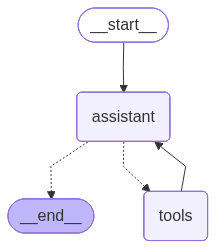

The current weather in Delhi is 17°C. Multiplying it by 2 gives 34, and adding 5 gives 39.


In [59]:


from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage
from langchain_community.tools import DuckDuckGoSearchRun
from langchain_groq import ChatGroq
from google.colab import userdata
from IPython.display import Image, display

# ---------------- STATE ----------------
class State(TypedDict):
    messages: Annotated[list, add_messages]

# ---------------- TOOLS ----------------
def search_duckduckgo(query: str):
    """search on web"""
    search = DuckDuckGoSearchRun()
    return search.run(query)

def multiply(a: int, b: int) -> int:
    """Multiply a and b"""
    return a * b

def add(a: int, b: int) -> int:
    """Multiply a and b"""
    return a + b

tools = [search_duckduckgo, multiply, add]

# ---------------- LLM ----------------
api_key = userdata.get("GROQ_API_KEY")

llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    groq_api_key=api_key,
    temperature=0
)

# IMPORTANT: bind tools for Groq
llm = llm.bind_tools(tools)

# ---------------- ASSISTANT NODE ----------------
def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

# ---------------- GRAPH ----------------
graph_builder = StateGraph(State)

graph_builder.add_node("assistant", chatbot)
graph_builder.add_node("tools", ToolNode(tools))

graph_builder.add_edge(START, "assistant")
graph_builder.add_conditional_edges("assistant", tools_condition)
graph_builder.add_edge("tools", "assistant")

react_graph = graph_builder.compile()

# ---------------- VISUALIZE ----------------
display(Image(react_graph.get_graph().draw_mermaid_png()))

# ---------------- RUN ----------------
response = react_graph.invoke({
    "messages": [HumanMessage(content="what is the weather in delhi. Multiply it by 2 and add 5")]
})

print(response["messages"][-1].content)


In [60]:
for m in response['messages']:
  m.pretty_print()

================================ Human Message =================================

what is the weather in delhi. Multiply it by 2 and add 5
================================== Ai Message ==================================
Tool Calls:
  search_duckduckgo (7nzzmxq20)
 Call ID: 7nzzmxq20
  Args:
    query: Delhi weather
  multiply (71jymrjw4)
 Call ID: 71jymrjw4
  Args:
    a: 30
    b: 2
  add (bfn7jx3zm)
 Call ID: bfn7jx3zm
  Args:
    a: 60
    b: 5
================================= Tool Message =================================
Name: search_duckduckgo

8 小時前 · Current New Delhi weather condition is Mist with real-time temperature (13°C), humidity 82%, wind 8.3km/h, pressure (1015mb), UV (0.8), visibility (3km) in ... 2025年4月7日 · Rajpath Area, Central Secretariat, Delhi Forecast · Today · Hourly · Daily. Morning. 21°. -- · Afternoon. 26°. -- · Evening. 19°. -- · Overnight. 15°. Chance ... 2026年1月18日 · 14 day weather · 28 · 26 · 28 · 29 · 29 · 29 · 30 · 30. We. 18. 31. Th. 17. 34. Fr. 16.